# Global Network Linearity-based Weighting

## 1. Methods

Let's consider neural network with $n$ layers. The output of the $i$-th layer corresponding to an input $X$ is given by, 

$$ A_i = \sigma ( \dots \sigma(\sigma( X W_1 + b_1 )W_2 + b_2) \dots )W_i + b_i) $$

Let $\mathcal{P}$ be a convex polytope in the input space encoded by the ReLU activation pattern $M_{\mathcal{P}} = [ m_{\mathcal{P}, 1}, m_{\mathcal{P}, 2}, \dots, m_{\mathcal{P}, n}]$, where $m_{\mathcal{P}, i}$ is a binary vector with dimensionality equal to the number of nodes in layer $i$, with non-zeros indicating which nodes were activated by the samples within $\mathcal{P}$. 

Let $X_{\mathcal{P}}$ be a batch of samples that belongs to the convex polytope $\mathcal{P}$. All the samples in $X_{\mathcal{P}}$ result in the ReLU activation pattern $m_{\mathcal{P}, 1}$ in the first layer. Therefore, instead of using ReLU, we could zero out columns of the weight matrix $W_1$ (and the bias $b_1$) that correspond to the inactive nodes of the layer and have have a linear system

$$ A_{\mathcal{P}, 1} = (X_{\mathcal{P}} W_1 + b_1) \text{diag}(m_{\mathcal{P}, 1}) = X_{\mathcal{P}} W_1  \text{diag}(m_{\mathcal{P}, 1}) + b_1 \text{diag}(m_{\mathcal{P}, 1})$$

Letting $\Omega_{\mathcal{P}, 1} = W_1  \text{diag}(m_{\mathcal{P}, 1}) $ and $ \beta_{\mathcal{P}, 1} = b_1 \text{diag}(m_{\mathcal{P}, 1}) $ we get,  

$$ A_{\mathcal{P}, 1} = X_{\mathcal{P}} \Omega_{\mathcal{P}, 1} + \beta_{\mathcal{P}, 1} $$

Thus, we can say that the output of the first layer is linear with respect to the input. In other words, $ \sigma (X_{\mathcal{P}} W_1 + b_1) = X_{\mathcal{P}} \Omega_{\mathcal{P}, 1} + \beta_{\mathcal{P}, 1} $.

Similary, we can obtain an expression for $A_{\mathcal{P}, 2}$.

$$ A_{\mathcal{P}, 2} = ((X_{\mathcal{P}} \Omega_{\mathcal{P}, 1} + \beta_{\mathcal{P}, 1})W_2 + b_2) \text{diag}(m_{\mathcal{P}, 2}) = X_{\mathcal{P}} \Omega_{\mathcal{P}, 2} + \beta_{\mathcal{P}, 2}$$ 

where, 
    $$ \Omega_{\mathcal{P}, 2} = \Omega_{\mathcal{P}, 1} W_2 \text{diag}(m_{\mathcal{P}, 2}) $$ 
    $$ \beta_{\mathcal{P}, 2} = \beta_{\mathcal{P}, 1} W_2 \text{diag}(m_{\mathcal{P}, 2}) + b_2  \text{diag}(m_{\mathcal{P}, 2}) $$

Extending this notion further, we can obtain an expression for the $i$-th layer.

$$ A_{\mathcal{P}, i} = X_{\mathcal{P}} \Omega_{\mathcal{P}, i} + \beta_{\mathcal{P}, i} $$

where, 
    $$ \Omega_{\mathcal{P}, i} = \Omega_{\mathcal{P}, i-1} W_i \text{diag}(m_{\mathcal{P}, i}) $$ 
    $$ \beta_{\mathcal{P}, i} = \beta_{\mathcal{P}, i-1} W_i \text{diag}(m_{\mathcal{P}, i}) + b_i \text{diag}(m_{\mathcal{P}, i}) $$

Therefore, we can observe that the output of each layer $i$ is linear with respect to the inputs from the same polytope $\mathcal{P}$, i.e. $ \sigma ( \dots \sigma(\sigma( X W_1 + b_1 )W_2 + b_2) \dots )W_i + b_i) = \sigma( (X_{\mathcal{P}} \Omega_{\mathcal{P}, i-1} + \beta_{\mathcal{P}, i-1}) W_i + b_i )   = X_{\mathcal{P}} \Omega_{\mathcal{P}, i} + \beta_{\mathcal{P}, i} $. The $\{ \Omega_i \}_{i=1}^{n}$ and $\{ \beta_i \}_{i=1}^{n}$ can be thought of as the weights of a sub-sampled network specific for the polytope $\mathcal{P}$ (say, $\mathcal{P}$-network) in which the layers behaves linearly for the input samples from $\mathcal{P}$.

Let $\mathcal{Q}$ be another convex polytope (different from $\mathcal{P}$) in the same input space and let $X_{\mathcal{Q}} $ be a batch of samples that belongs to the convex polytope $\mathcal{Q}$. We make the following assumptions regarding $X_{\mathcal{Q}} $ and $\mathcal{P}$-network.

* If $X_{\mathcal{Q}} \subset X_{\mathcal{P}}$, then the layers of $\mathcal{P}$-network behaves linearly with respect to the inputs $X_{\mathcal{Q}}$.

* If $P$ and $Q$ are in close proximity (samples in $Q$ have a high possibility of ending up in $P$), then the layers of $\mathcal{P}$-network behaves approximately linearly with respect to the inputs $X_{\mathcal{Q}}$.

* If $P$ and $Q$ are distant (samples in $Q$ have a low possibility of ending up in $P$), then the layers of $\mathcal{P}$-network does not behave linearly with respect to the inputs $X_{\mathcal{Q}}$.

In the light of these assumptions, we hypothesize that the degree of linearity exhibited by the $\mathcal{P}$-network with respect to $X_{\mathcal{Q}}$ in a sense reflects the similarity between the polytopes $\mathcal{P}$ and $\mathcal{Q}$. The higher the linearity, the more closely $\mathcal{P}$ and $\mathcal{Q}$ are related to each other.

To quantify the linearity of layer $i$ of the $\mathcal{P}$-network w.r.t $\mathcal{Q}$, we compare the nodes of layer $i$ of the $\mathcal{P}$-network that are activated by an input sample $x_{\mathcal{P}}$ from $\mathcal{P}$ and input sample $x_{\mathcal{Q}}$ from $\mathcal{Q}$. Let support $m = \text{supp}(a)$, be a binary 0/1 vector where $m_j = 1$ where $a_j > 0$. Then, 

$$ m_{\mathcal{P}, i} (x_\mathcal{Q}) = \text{supp}( \sigma( (x_{\mathcal{Q}} \Omega_{\mathcal{P}, i-1} + \beta_{\mathcal{P}, i-1}) W_i + b_i ) ) $$ 

$$ m_{\mathcal{P}, i} (x_\mathcal{P}) = \text{supp}( x_{\mathcal{P}} \Omega_{\mathcal{P}, i} + \beta_{\mathcal{P}, i}) $$

Here, we make the observation that $ m_{\mathcal{P}, i} (x_\mathcal{P}) = m_{\mathcal{P}, i}$. By aggregating the node activation patterns across all the layers, we obtain 

$$ M_{\mathcal{P}}(x_\mathcal{Q}) = [ m_{\mathcal{P}, 1} (x_\mathcal{Q}), m_{\mathcal{P}, 2} (x_\mathcal{Q}), \dots, m_{\mathcal{P}, n} (x_\mathcal{Q})] $$

$$ M_{\mathcal{P}}(x_\mathcal{P}) = [ m_{\mathcal{P}, 1}, m_{\mathcal{P}, 2}, \dots, m_{\mathcal{P}, n}]$$ 

Here, it's clear that $M_{\mathcal{P}}(x_\mathcal{P}) = M_{\mathcal{P}}$ which is the ReLU activation pattern of the polytope $\mathcal{P}$. Finally, we define the following measure,

$$ w_{\mathcal{P}}(\mathcal{Q}) = \exp ( - c \Vert M_{\mathcal{P}}(x_\mathcal{Q}) - M_{\mathcal{P}} \Vert_1) $$

where $c$ is tuning parameter (set to 1 by default). We hypothesize that $w_{\mathcal{P}}(\mathcal{Q}) \in (0, 1]$ measures the global linearity of the $\mathcal{P}$-network w.r.t to an input from the polytope $\mathcal{Q}$. The higher the $w_{\mathcal{P}}(\mathcal{Q})$, the more closely related $\mathcal{P}$ and $\mathcal{Q}$ are. $w_{\mathcal{P}}(\mathcal{Q}) = 1$ when $\mathcal{Q} \subset \mathcal{P}$. Thus $w_{\mathcal{P}}(\mathcal{Q})$ emerges as a candiate to weight polytopes during the training of kernel density networks.

The remainder of this notebook is organized as follows. 

1. We compute the global network linearity-based weights for selected polytopes induced by MLPs trained on G-XOR and Spiral Dataset
2. We demonstrate the applicability of the proposed weighting scheme in the KDN.

## 2. Experiments

### 2.1 G-XOR

This section walks you through an experiment involving the Gaussian XOR dataset.

In [1]:
# import standard modules
import sys
sys.path.insert(1, '/Users/ashwin/NeuroData/research/kdg/docs/tutorials')
import numpy as np
from tensorflow import keras
from keras import layers
from kdg.kdn import *
from kdg.utils import generate_gaussian_parity
import pandas as pd
import seaborn as sns
sns.set_context("talk")
import matplotlib.pyplot as plt

# import external modules
from functions.global_linearity_based_weighting_support_functions import unit_step, get_activation_pattern, get_polytope_memberships

Let's begin by creating the train, test, and validation data.

In [2]:
# generate training data
X, y = generate_gaussian_parity(10000)

# generate validation data
X_val, y_val = generate_gaussian_parity(500)

# generate validation data
X_test, y_test = generate_gaussian_parity(1000)

Next, we define a simple (5, 5, 2) multi-layer perceptron and train it on the dataset we created earlier. We monitor the validation loss to avoid overfitting (this is an important step to ensure that the model learns better parititions (polytopes) of the input space)

In [3]:
# NN params
compile_kwargs = {
    "loss": "binary_crossentropy",
    "optimizer": keras.optimizers.Adam(1e-3)
    }
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=True)
fit_kwargs = {
    "epochs": 200,
    "batch_size": 32,
    "verbose": True,
    "validation_data": (X_val, keras.utils.to_categorical(y_val)),
    "callbacks": [callback]
    }

# network architecture
def getNN():
    network = keras.Sequential()
    network.add(layers.Dense(5, activation='relu', input_shape=(2,)))
    network.add(layers.Dense(5, activation='relu'))
    network.add(layers.Dense(units=2, activation = 'softmax'))
    network.compile(**compile_kwargs)
    return network

In [4]:
# train NN
nn = getNN()
history = nn.fit(X, keras.utils.to_categorical(y), **fit_kwargs)

Epoch 1/200
313/313 [==============================] - 2s 3ms/step - loss: 0.6488 - val_loss: 0.6150
Epoch 2/200
313/313 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5395
Epoch 3/200
313/313 [==============================] - 1s 2ms/step - loss: 0.5009 - val_loss: 0.4727
Epoch 4/200
313/313 [==============================] - 1s 2ms/step - loss: 0.4561 - val_loss: 0.4420
Epoch 5/200
313/313 [==============================] - 1s 2ms/step - loss: 0.4300 - val_loss: 0.4184
Epoch 6/200
313/313 [==============================] - 0s 1ms/step - loss: 0.4073 - val_loss: 0.3831
Epoch 7/200
313/313 [==============================] - 1s 2ms/step - loss: 0.3515 - val_loss: 0.3073
Epoch 8/200
313/313 [==============================] - 1s 2ms/step - loss: 0.2825 - val_loss: 0.2485
Epoch 9/200
313/313 [==============================] - 1s 3ms/step - loss: 0.2387 - val_loss: 0.2143
Epoch 10/200
313/313 [==============================] - 1s 2ms/step - loss: 0.2106 - val_lo

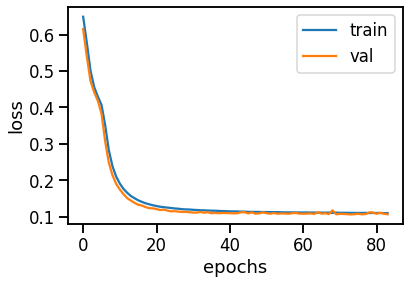

In [5]:
# plot the training loss and validation loss 
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])

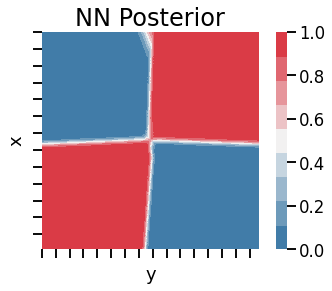

In [6]:
# plot the posterior
p = np.arange(-2, 2, step=0.005)
q = np.arange(-2, 2, step=0.005)
xx, yy = np.meshgrid(p,q)
tmp = np.ones(xx.shape)

grid_samples = np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1) 
    
proba_nn = nn.predict(grid_samples)

data_nn = pd.DataFrame(data={'x':grid_samples[:,0], 'y':grid_samples[:,1], 'z':proba_nn[:,0]})
data_nn = data_nn.pivot(index='x', columns='y', values='z')

sns.set_context("talk")
fig, ax = plt.subplots()
cmap= sns.diverging_palette(240, 10, n=9)

sns.heatmap(data_nn, ax=ax, vmin=0, vmax=1,cmap=cmap)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('NN Posterior',fontsize=24)
ax.set_aspect('equal')

In [7]:
# get the weights and biases of the trained MLP
weights = {}
biases = {}
for i in range(len(nn.layers)):
    weight, bias = nn.layers[i].get_weights()
    weights[i], biases[i] = weight, bias.reshape(1, -1)

In [8]:
# select polytopes with more than 50 samples in class 1
label = 1
network_shape = [5, 5, 2]
X_ = X[y==label]
polytope_ids = get_polytope_memberships(X_, nn)[0]
polytope_patterns = []
for i in polytope_ids:
    polytope_patterns.append(get_activation_pattern(i, network_shape))
polytope_patterns = np.array(polytope_patterns)

selected_polytopes = []
for i in np.unique(polytope_ids):
    if np.sum(polytope_ids == i) > 50:
        selected_polytopes.append(i)

print("Selected Polytopes : ", selected_polytopes)

Selected Polytopes :  [4, 7, 20, 21, 23, 132, 148, 151, 503, 664, 665, 921, 923, 927, 987, 991, 1019, 1023]


In [11]:
# computing weights based on global network linearity
def compute_weights(X_, polytope_id, c, network_shape, weights, biases):
    M_ref = get_activation_pattern(polytope_id, network_shape)

    M = np.empty((X_.shape[0], 0))
    start = 0
    for l in range(len(network_shape)-1):
        if l == 0:
            W = weights[l]
            B = biases[l]
            M = np.hstack((M, unit_step(X_ @ W + B)))
        else:
            end = start + network_shape[l-1]
            M_l = M_ref[start:end]
            start = end
            W = W @ np.diag(M_l) @ weights[l]
            B = B @ np.diag(M_l) @ weights[l] + biases[l]
            M = np.hstack((M, unit_step(X_ @ W + B)))
    
    return np.exp(-c * np.linalg.norm(M - M_ref, axis=1, ord=1))

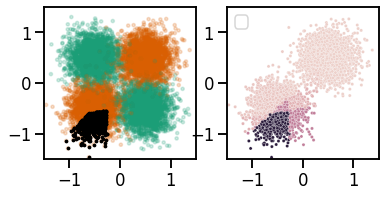

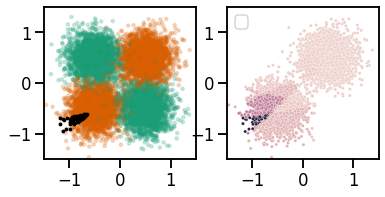

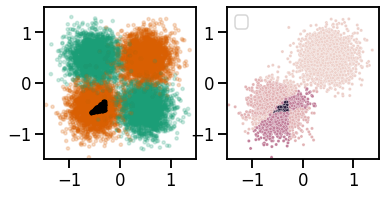

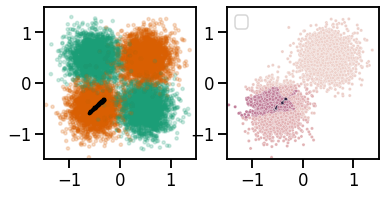

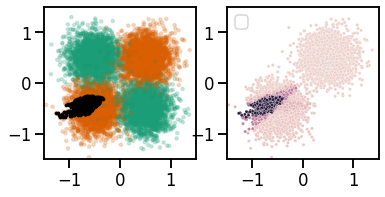

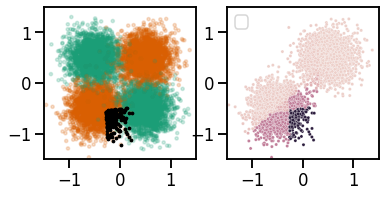

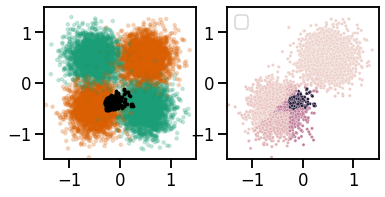

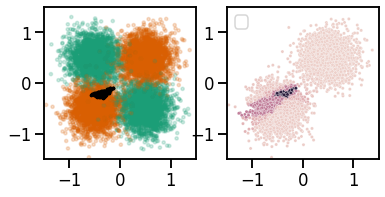

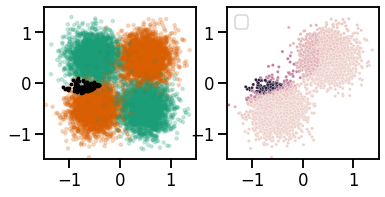

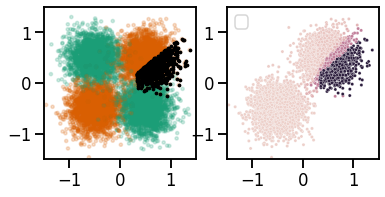

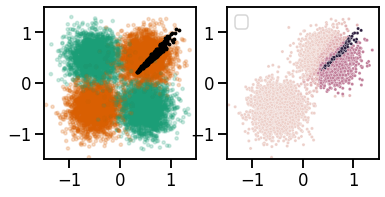

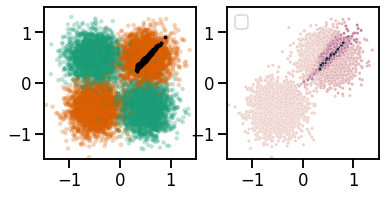

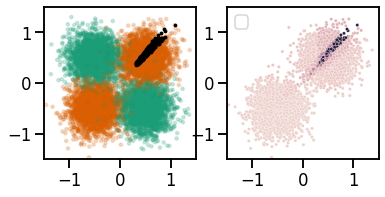

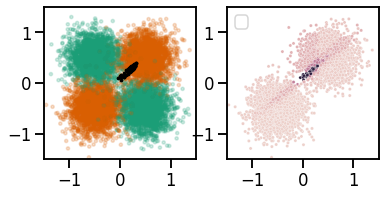

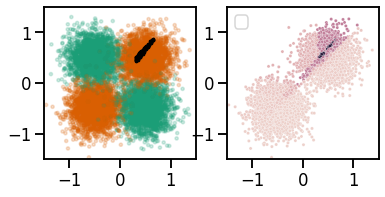

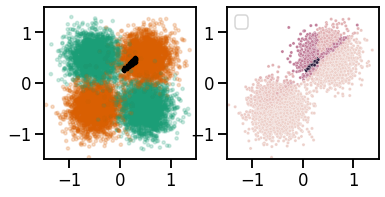

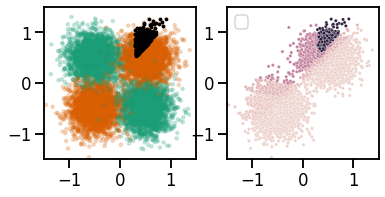

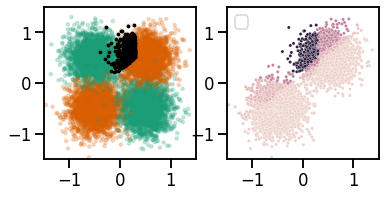

In [12]:
for polytope_id in selected_polytopes:
    P_ = X_[polytope_ids == polytope_id]
    scales = compute_weights(X_, polytope_id, 1, network_shape, weights, biases)
    
    fig, ax = plt.subplots(1, 2)

    colors = sns.color_palette("Dark2", n_colors=2)
    clr = [colors[i] for i in y]
    ax[0].scatter(X[:, 0], X[:, 1], c=clr, s=10, alpha=0.2)
    ax[0].scatter(P_[:, 0], P_[:, 1], c='k', s=5, alpha=1)
    ax[0].set_xlim([-1.5, 1.5])
    ax[0].set_ylim([-1.5, 1.5])
    ax[0].set_aspect('equal')

    sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=scales, ax=ax[1], s=10)
    ax[1].set_xlim([-1.5, 1.5])
    ax[1].set_ylim([-1.5, 1.5])
    ax[1].legend([])
    ax[1].set_aspect('equal')

### 2.2 KDN on Spiral Dataset

In [2]:
from kdg.utils import generate_spirals
from kdg.kdn import *

In [3]:
X, y = generate_spirals(10000, noise=.8, n_class=2)
X_val, y_val = generate_spirals(500, noise=.8, n_class=2)

# NN params
compile_kwargs = {
    "loss": "binary_crossentropy",
    "optimizer": keras.optimizers.Adam(3e-4)
    }
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=True)
fit_kwargs = {
    "epochs": 300,
    "batch_size": 32,
    "verbose": True,
    "validation_data": (X_val, keras.utils.to_categorical(y_val)),
    "callbacks": [callback]
    }

In [4]:
# network architecture
def getNN():
    network_base = keras.Sequential()
    network_base.add(layers.Dense(10, activation='relu', input_shape=(2,)))
    network_base.add(layers.Dense(10, activation='relu'))
    network_base.add(layers.Dense(10, activation='relu'))
    network_base.add(layers.Dense(5, activation='relu'))
    network_base.add(layers.Dense(units=2, activation = 'softmax'))
    network_base.compile(**compile_kwargs)
    return network_base

In [5]:
# train Vanilla NN
vanilla_nn = getNN()
history = vanilla_nn.fit(X, keras.utils.to_categorical(y), **fit_kwargs)

Epoch 1/300
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - val_loss: 0.6927
Epoch 2/300
313/313 [==============================] - 1s 3ms/step - loss: 0.6920 - val_loss: 0.6918
Epoch 3/300
313/313 [==============================] - 1s 3ms/step - loss: 0.6900 - val_loss: 0.6910
Epoch 4/300
313/313 [==============================] - 1s 2ms/step - loss: 0.6879 - val_loss: 0.6901
Epoch 5/300
313/313 [==============================] - 1s 3ms/step - loss: 0.6858 - val_loss: 0.6887
Epoch 6/300
313/313 [==============================] - 0s 1ms/step - loss: 0.6833 - val_loss: 0.6857
Epoch 7/300
313/313 [==============================] - 0s 1ms/step - loss: 0.6790 - val_loss: 0.6808
Epoch 8/300
313/313 [==============================] - 0s 1ms/step - loss: 0.6724 - val_loss: 0.6735
Epoch 9/300
313/313 [==============================] - 0s 1ms/step - loss: 0.6647 - val_loss: 0.6654
Epoch 10/300
313/313 [==============================] - 0s 1ms/step - loss: 0.6568 - val_lo

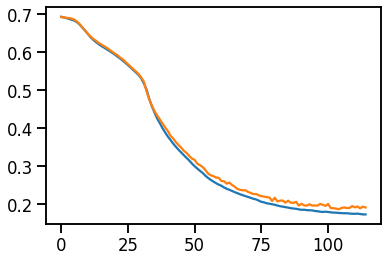

In [6]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

In [7]:
X_test, y_test = generate_spirals(1000, noise=.8, n_class=2)

accuracy_nn = np.mean(
                np.argmax(vanilla_nn.predict(X_test), axis=1) == y_test
            )

print("Vanilla NN accuracy : ", accuracy_nn)

Vanilla NN accuracy :  0.942


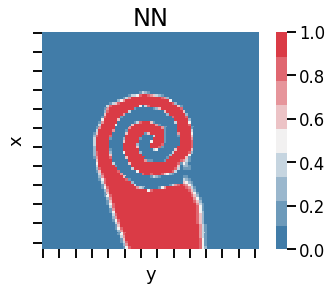

In [8]:
p = np.arange(-2, 2, step=0.05)
q = np.arange(-2, 2, step=0.05)
xx, yy = np.meshgrid(p,q)
tmp = np.ones(xx.shape)

grid_samples = np.concatenate(
            (
                xx.reshape(-1,1),
                yy.reshape(-1,1)
            ),
            axis=1
    ) 
    
proba_nn = vanilla_nn.predict(grid_samples)

data_nn = pd.DataFrame(data={'x':grid_samples[:,0], 'y':grid_samples[:,1], 'z':proba_nn[:,0]})
data_nn = data_nn.pivot(index='x', columns='y', values='z')

sns.set_context("talk")
fig, ax = plt.subplots()
cmap= sns.diverging_palette(240, 10, n=9)

sns.heatmap(data_nn, ax=ax, vmin=0, vmax=1,cmap=cmap)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('NN',fontsize=24)
ax.set_aspect('equal')


In [40]:
model_kdn = kdn(network=vanilla_nn, 
                k=1e-4,
                weighting_method='lin',
                c=1,
                T=2,
                verbose=False)
model_kdn.fit(X, y)

In [41]:
X_test, y_test = generate_spirals(1000, noise=.8, n_class=2)

accuracy_kdn = np.mean(
                model_kdn.predict(X_test) == y_test
                )
        
accuracy_nn = np.mean(
                np.argmax(vanilla_nn.predict(X_test), axis=1) == y_test
            )

print("Vanilla NN accuracy : ", accuracy_nn)
print("KDN accuracy : ", accuracy_kdn)

Vanilla NN accuracy :  0.94
KDN accuracy :  0.931


In [42]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(-2,2,step=0.05)
q = np.arange(-2,2,step=0.05)
xx, yy = np.meshgrid(p,q)
tmp = np.ones(xx.shape)

grid_samples = np.concatenate(
            (
                xx.reshape(-1,1),
                yy.reshape(-1,1)
            ),
            axis=1
    ) 
    

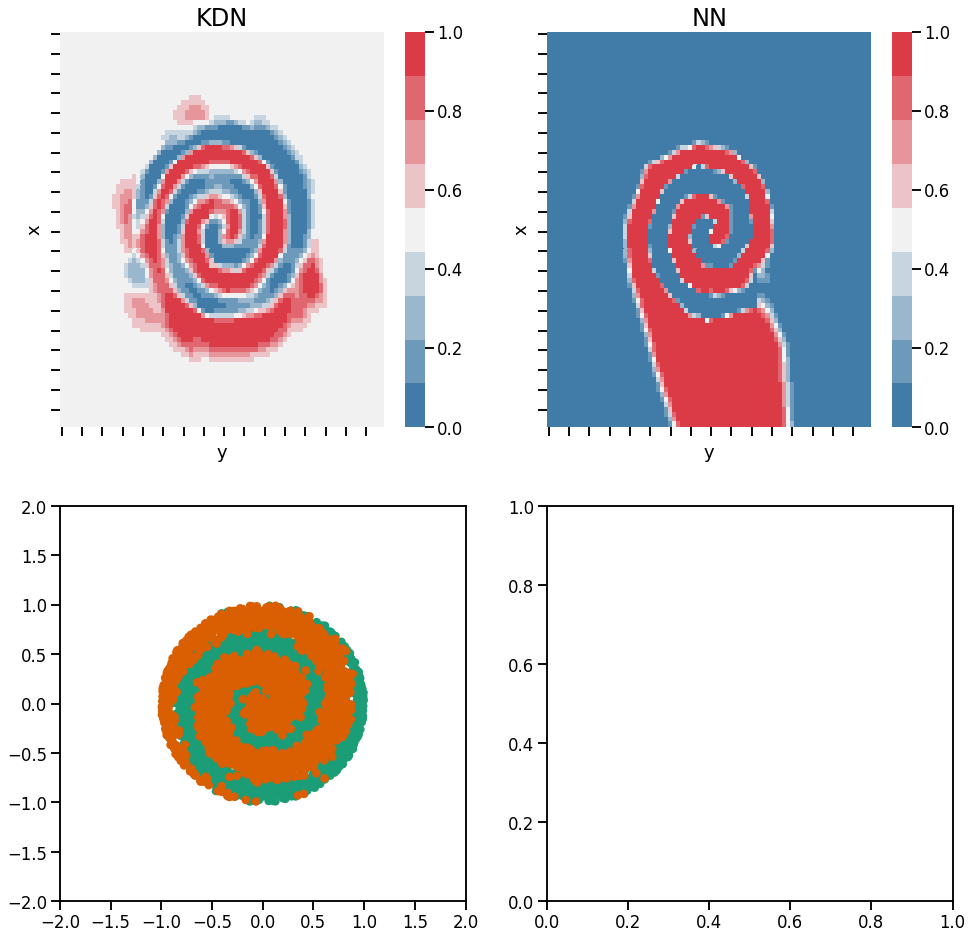

In [43]:
proba_kdf = model_kdn.predict_proba(grid_samples)
proba_nn = model_kdn.predict_proba_nn(grid_samples)

data = pd.DataFrame(data={'x':grid_samples[:,0], 'y':grid_samples[:,1], 'z':proba_kdf[:,0]})
data = data.pivot(index='x', columns='y', values='z')

data_rf = pd.DataFrame(data={'x':grid_samples[:,0], 'y':grid_samples[:,1], 'z':proba_nn[:,0]})
data_rf = data_rf.pivot(index='x', columns='y', values='z')

sns.set_context("talk")
fig, ax = plt.subplots(2,2, figsize=(16,16))
cmap= sns.diverging_palette(240, 10, n=9)
ax1 = sns.heatmap(data, ax=ax[0][0], vmin=0, vmax=1,cmap=cmap)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
# ax1.set_xticklabels(['-2','' , '', '', '', '', '','','','','0','','','','','','','','','2'])
# ax1.set_yticklabels(['-2','' , '', '', '', '', '','','','','','','0','','','','','','','','','','','','','2'])
#ax1.set_yticklabels(['-1','' , '', '', '', '', '','','','' , '', '', '', '', '', '','','','','', '0','','' , '', '', '', '', '','','','','','','','','','','','','1'])
ax[0][0].set_title('KDN',fontsize=24)
#ax[0][0].invert_yaxis()


ax1 = sns.heatmap(data_rf, ax=ax[0][1], vmin=0, vmax=1,cmap=cmap)
# ax1.set_xticklabels(['-2','' , '', '', '', '', '','','','','0','','','','','','','','','2'])
# ax1.set_yticklabels(['-2','' , '', '', '', '', '','','','','','','0','','','','','','','','','','','','','2'])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#ax1.set_yticklabels(['-1','' , '', '', '', '', '','','','' , '', '', '', '', '', '','','','','', '0','','' , '', '', '', '', '','','','','','','','','','','','','1'])
ax[0][1].set_title('NN',fontsize=24)
#ax[0][1].invert_yaxis()

colors = sns.color_palette("Dark2", n_colors=2)
clr = [colors[i] for i in y]
ax[1][0].scatter(X[:, 0], X[:, 1], c=clr, s=50)
ax[1][0].set_xlim(-2, 2)
ax[1][0].set_ylim(-2, 2)

# plt.savefig('plots/spiral_pdf.pdf')
plt.show()